In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read csv data
df = pd.read_csv(r'https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/data/cleaned_dataset/cleaned_dataset_monthly.csv')

# **Part 1. Linear Regression**

In [8]:
df.head()

,Unnamed: 0,Year_month,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index
0,0,2009-03,Asheville,0.0,21591.0,14001.106951,33746.009766,410.505670,8.3,219961.0
1,1,2009-03,Austin,2.0,356289.0,87051.171328,41626.023145,1659.248735,5.6,239585.0
2,2,2009-03,Los Angeles,0.0,2217920.0,727449.149945,43326.797919,0.000000,12.3,450380.0
3,3,2009-03,Nashville,0.0,372525.0,82942.503843,41497.681652,1573.920419,8.1,183480.0
4,4,2009-03,New Orleans,0.0,345850.0,64956.921299,39065.333507,1242.624734,7.1,153999.0


In [9]:
# take log of columns.
to_log_columns = ['num_listings','Passenger','GDP','PI','population','unemployment rate', \
                  'housing price index']
for column in to_log_columns:
  df[column] = np.log(df[column]+1)
df.head()

,Unnamed: 0,Year_month,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index
0,0,2009-03,Asheville,0.000000,9.980078,9.546963,10.426647,6.019823,2.230014,12.301210
1,1,2009-03,Austin,1.098612,12.783500,11.374263,10.636505,7.414723,1.887070,12.386668
2,2,2009-03,Los Angeles,0.000000,14.612081,13.497301,10.676550,0.000000,2.587764,13.017849
3,3,2009-03,Nashville,0.000000,12.828062,11.325915,10.633417,7.361960,2.208274,12.119866
4,4,2009-03,New Orleans,0.000000,12.753763,11.081495,10.573016,7.125786,2.091864,11.944708


In [29]:
# A simple OLS with no controls.
OLS_y = df['housing price index']
OLS_X = sm.add_constant(df[['num_listings']])
result_simple_OLS = sm.OLS(OLS_y, OLS_X).fit(cov_type='HC1')
result_simple_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing price index   R-squared:                       0.366
Model:                             OLS   Adj. R-squared:                  0.365
Method:                  Least Squares   F-statistic:                     318.2
Date:                 Sat, 17 Jul 2021   Prob (F-statistic):           3.97e-58
Time:                         04:57:21   Log-Likelihood:                -216.41
No. Observations:                  645   AIC:                             436.8
Df Residuals:                      643   BIC:                             445.8
Df Model:                            1                                         
Covariance Type:                   HC1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.0045      0.028    432.008      0.000      11.950      12.059
num_listings     0.0968      0.005     17.839      0.000       0.086       0.107
==============================================================================
Omnibus:                       43.269   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.061
Skew:                           0.657   Prob(JB):                     2.22e-11
Kurtosis:                       2.684   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [30]:
# one-hot city column
df = df.iloc[:,1:].join(pd.get_dummies(df.city))

In [31]:
# one-hot date column by year
df['Year_month'] = df['Year_month'].map(lambda x: x.split('-')[0])
df = df.iloc[:,1:].join(pd.get_dummies(df.Year_month))
df

# calculate logged population
df['population_logged'] = np.log(df['population'])

In [32]:
# Simple OLS with time and city fixed effects.
# New Orleans and 2019 are deleted to prevent multicollinearity. Results show that coefficient on num_listings decline in magnitude.
OLS_y = df['housing price index']
OLS_X = sm.add_constant(df[['num_listings','Asheville','Los Angeles','Austin','Nashville', \
                        '2009', '2010', '2011', '2012', '2013', '2014', '2015', \
                        '2016', '2017', '2018']])
result_simple_OLS = sm.OLS(OLS_y, OLS_X).fit(cov_type='HC1')
result_simple_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing price index   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.988
Method:                  Least Squares   F-statistic:                     5733.
Date:                 Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                         04:59:38   Log-Likelihood:                 1061.8
No. Observations:                  645   AIC:                            -2092.
Df Residuals:                      629   BIC:                            -2020.
Df Model:                           15                                         
Covariance Type:                   HC1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.2700      0.035    346.820      0.000      12.201      12.339
num_listings     0.0118      0.004      2.644      0.008       0.003       0.021
Asheville        0.2496      0.007     34.767      0.000       0.236       0.264
Los Angeles      1.0712      0.009    113.009      0.000       1.053       1.090
Austin           0.4836      0.007     68.680      0.000       0.470       0.497
Nashville        0.1388      0.006     21.998      0.000       0.126       0.151
2009            -0.3275      0.036     -9.094      0.000      -0.398      -0.257
2010            -0.3504      0.031    -11.343      0.000      -0.411      -0.290
2011            -0.4028      0.026    -15.558      0.000      -0.454      -0.352
2012            -0.4202      0.021    -19.928      0.000      -0.462      -0.379
2013            -0.3430      0.018    -19.241      0.000      -0.378      -0.308
2014            -0.2678      0.014    -18.858      0.000      -0.296      -0.240
2015            -0.2044      0.013    -16.334      0.000      -0.229      -0.180
2016            -0.1300      0.011    -12.065      0.000      -0.151      -0.109
2017            -0.0687      0.010     -6.820      0.000      -0.088      -0.049
2018            -0.0175      0.011     -1.593      0.111      -0.039       0.004
==============================================================================
Omnibus:                       14.494   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.107
Skew:                          -0.260   Prob(JB):                      0.00235
Kurtosis:                       2.575   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [33]:
df = pd.merge(df, occupancy_rate, on =['city'])
df['listing x occupancy'] = df['num_listings'] * df['occupancy_rate']
df.head()

,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index,Asheville,Austin,Los Angeles,Nashville,New Orleans,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,population_logged,occupancy_rate,listing x occupancy
0,Asheville,0.0,9.980078,9.546963,10.426647,6.019823,2.230014,12.301210,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.795058,0.904,0.0
1,Asheville,0.0,10.077357,9.550268,10.428798,6.020854,2.186051,12.297480,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.795229,0.904,0.0
2,Asheville,0.0,10.142308,9.553562,10.430944,6.021884,2.197225,12.291369,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.795400,0.904,0.0
3,Asheville,0.0,10.254074,9.556846,10.433086,6.022914,2.230014,12.291938,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.795571,0.904,0.0
4,Asheville,0.0,10.263676,9.560118,10.435223,6.023942,2.163323,12.291153,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.795742,0.904,0.0


In [ ]:
# # scale desired columns
# df.dropna(inplace = True)
# columns_to_scale = ['density','density_log','GDP', 'PI', 'Passenger', \
#                     'unemployment rate', 'housing price index', 'population_logged']

# df_scaled = df.copy()

# for column in columns_to_scale:
#   df_scaled.loc[:,column] = (df_scaled.loc[:,column]-df_scaled.loc[:,column].mean())/df_scaled.loc[:,column].std()

# df_scaled.head()

In [34]:
# run OLS model - WITH LA, NOT SCALED
y = df['housing price index']
X = sm.add_constant(df[['num_listings','listing x occupancy','GDP','PI','Passenger', 'population',\
                        'unemployment rate','Asheville','Los Angeles','Austin','Nashville', \
                        '2009', '2010', '2011', '2012', '2013', '2014', '2015', \
                        '2016', '2017', '2018']])
result = sm.OLS(y, X).fit(cov_type='HC1')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing price index   R-squared:                       0.992
Model:                             OLS   Adj. R-squared:                  0.991
Method:                  Least Squares   F-statistic:                     5254.
Date:                 Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                         05:05:14   Log-Likelihood:                 1180.0
No. Observations:                  645   AIC:                            -2316.
Df Residuals:                      623   BIC:                            -2218.
Df Model:                           21                                         
Covariance Type:                   HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.8608      3.527      2.512      0.012       1.948      15.774
num_listings            0.0452      0.017      2.728      0.006       0.013       0.078
listing x occupancy    -0.0371      0.017     -2.187      0.029      -0.070      -0.004
GDP                     0.8147      0.101      8.088      0.000       0.617       1.012
PI                     -0.5508      0.394     -1.398      0.162      -1.323       0.222
Passenger               0.0151      0.013      1.181      0.238      -0.010       0.040
population              0.0063      0.002      3.832      0.000       0.003       0.010
unemployment rate      -0.1111      0.017     -6.435      0.000      -0.145      -0.077
Asheville               1.4109      0.125     11.275      0.000       1.166       1.656
Los Angeles            -0.8714      0.212     -4.104      0.000      -1.288      -0.455
Austin                  0.1356      0.028      4.806      0.000       0.080       0.191
Nashville              -0.1259      0.023     -5.371      0.000      -0.172      -0.080
2009                   -0.0493      0.058     -0.846      0.398      -0.164       0.065
2010                   -0.1060      0.052     -2.027      0.043      -0.209      -0.003
2011                   -0.1833      0.046     -3.980      0.000      -0.274      -0.093
2012                   -0.2326      0.039     -5.906      0.000      -0.310      -0.155
2013                   -0.1857      0.035     -5.363      0.000      -0.254      -0.118
2014                   -0.1435      0.029     -5.013      0.000      -0.200      -0.087
2015                   -0.1089      0.024     -4.634      0.000      -0.155      -0.063
2016                   -0.0621      0.018     -3.483      0.000      -0.097      -0.027
2017                   -0.0285      0.013     -2.236      0.025      -0.053      -0.004
2018                    0.0012      0.009      0.131      0.896      -0.017       0.019
==============================================================================
Omnibus:                        4.748   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.433
Skew:                          -0.152   Prob(JB):                        0.109
Kurtosis:                       2.730   Cond. No.                     5.13e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# # run OLS model - WITH LA, SCALED
# y = df_scaled['housing price index']
# X = sm.add_constant(df_scaled[['num_listings','GDP','PI','Passenger', 'population',\
#                         'unemployment rate','Asheville','Los Angeles','Austin','Nashville', \
#                         '2009', '2010', '2011', '2012', '2013', '2014', '2015', \
#                         '2016', '2017', '2018']])
# result = sm.OLS(y, X).fit(cov_type='HC1')
# result.summary()

In [35]:
# run OLS model - WITHOUT LA, NOT SCALED
df_no_la_no_scale = df.loc[df['city'] != 'Los Angeles']
y = df_no_la_no_scale['housing price index']
X = sm.add_constant(df_no_la_no_scale[['num_listings','listing x occupancy','GDP','PI','Passenger', 'population',\
                        'unemployment rate','Asheville','Austin','Nashville', \
                        '2009', '2010', '2011', '2012', '2013', '2014', '2015', \
                        '2016', '2017', '2018']])
result = sm.OLS(y, X).fit(cov_type='HC1')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing price index   R-squared:                       0.987
Model:                             OLS   Adj. R-squared:                  0.986
Method:                  Least Squares   F-statistic:                     2602.
Date:                 Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                         05:05:33   Log-Likelihood:                 1096.3
No. Observations:                  516   AIC:                            -2151.
Df Residuals:                      495   BIC:                            -2061.
Df Model:                           20                                         
Covariance Type:                   HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1323      4.735     -0.028      0.978      -9.413       9.148
num_listings            0.2157      0.013     16.669      0.000       0.190       0.241
listing x occupancy    -0.1944      0.014    -13.726      0.000      -0.222      -0.167
GDP                    -2.6730      0.573     -4.661      0.000      -3.797      -1.549
PI                      0.7521      0.656      1.146      0.252      -0.534       2.038
Passenger               0.0342      0.010      3.360      0.001       0.014       0.054
population              4.7149      0.573      8.227      0.000       3.592       5.838
unemployment rate      -0.0750      0.015     -4.844      0.000      -0.105      -0.045
Asheville               1.6000      0.191      8.373      0.000       1.225       1.975
Austin                 -0.2926      0.039     -7.424      0.000      -0.370      -0.215
Nashville              -0.3978      0.032    -12.562      0.000      -0.460      -0.336
2009                   -0.0899      0.048     -1.862      0.063      -0.185       0.005
2010                   -0.1134      0.045     -2.544      0.011      -0.201      -0.026
2011                   -0.1811      0.040     -4.562      0.000      -0.259      -0.103
2012                   -0.2355      0.034     -6.939      0.000      -0.302      -0.169
2013                   -0.2071      0.030     -6.926      0.000      -0.266      -0.149
2014                   -0.1638      0.025     -6.535      0.000      -0.213      -0.115
2015                   -0.1211      0.021     -5.796      0.000      -0.162      -0.080
2016                   -0.0679      0.016     -4.293      0.000      -0.099      -0.037
2017                   -0.0316      0.012     -2.736      0.006      -0.054      -0.009
2018                   -0.0036      0.009     -0.402      0.687      -0.021       0.014
==============================================================================
Omnibus:                       12.561   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.967
Skew:                           0.205   Prob(JB):                       0.0113
Kurtosis:                       2.501   Cond. No.                     8.02e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 8.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# # run OLS model - WITHOUT LA, SCALED
# df_no_la_scaled = df_scaled.loc[df['city'] != 'Los Angeles']
# y = df_no_la_scaled['housing price index']
# X = sm.add_constant(df_no_la_scaled[['num_listings','GDP','PI','Passenger', 'population',\
#                         'unemployment rate','Asheville','Austin','Nashville', \
#                         '2009', '2010', '2011', '2012', '2013', '2014', '2015', \
#                         '2016', '2017', '2018']])
# result = sm.OLS(y, X).fit(cov_type='HC1')
# result.summary()

In [ ]:
# # run OLS model - WITH LA, SCALED, + Random Columns
# df_experiment = df_scaled.copy()
# df_experiment['rand'] = np.random.rand(df_experiment.shape[0])
# y = df_experiment['housing price index']
# X = sm.add_constant(df_experiment[['num_listings','GDP','PI','Passenger', 'population',\
#                         'unemployment rate','Asheville','Los Angeles','Austin','Nashville','rand', \
#                         '2009', '2010', '2011', '2012', '2013', '2014', '2015', \
#                         '2016', '2017', '2018']])
# result = sm.OLS(y, X).fit(cov_type='HC1')
# result.summary()

In [12]:
estab = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/data/goole%20index%26estab/09_estab.csv')
estab = estab.iloc[:, 1:]
estab

,MSA,Establishment
0,Austin,40281
1,Asheville,11639
2,Los Angeles,333006
3,Nashville,37883
4,New Orleans,29100


In [6]:
occupancy_rate = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/data/occupancy_rate/occupancy.csv')
occupancy_rate

,city,occupancy_rate
0,Asheville,0.904
1,Austin,0.922
2,Los Angeles,0.933
3,Nashville,0.901
4,New Orleans,0.725


In [8]:
google_index = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/data/goole%20index%26estab/google_index.csv')
google_index = google_index.iloc[:, 1:]
google_index

,month,airbnb
0,2009-01,0
1,2009-02,0
2,2009-03,0
3,2009-04,0
4,2009-05,0
...,...,...
127,2019-08,91
128,2019-09,77
129,2019-10,74
130,2019-11,69


## Part II. Two Stage Least Squares

In [54]:
# Reload the dataset to perform two stage least squares.
df = pd.read_csv(r'https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/data/cleaned_dataset/cleaned_dataset_monthly.csv')

### IV Justification

In [55]:
estab = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/data/goole%20index%26estab/09_estab.csv')
estab = estab.iloc[:, 1:].sort_values(by='Establishment')
estab

,MSA,Establishment
1,Asheville,11639
4,New Orleans,29100
3,Nashville,37883
0,Austin,40281
2,Los Angeles,333006


In [56]:
df_IV = df.copy()
df_IV

,Unnamed: 0,Year_month,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index
0,0,2009-03,Asheville,0.00,21591.0,1.400111e+04,33746.009766,410.505670,8.3,219961.0
1,1,2009-03,Austin,2.00,356289.0,8.705117e+04,41626.023145,1659.248735,5.6,239585.0
2,2,2009-03,Los Angeles,0.00,2217920.0,7.274491e+05,43326.797919,0.000000,12.3,450380.0
3,3,2009-03,Nashville,0.00,372525.0,8.294250e+04,41497.681652,1573.920419,8.1,183480.0
4,4,2009-03,New Orleans,0.00,345850.0,6.495692e+04,39065.333507,1242.624734,7.1,153999.0
...,...,...,...,...,...,...,...,...,...,...
640,640,2019-11,Asheville,1441.50,69394.0,1.993445e+04,43046.807353,464.855148,2.6,297489.0
641,641,2019-11,Austin,3429.50,703163.0,1.470664e+05,53558.440882,2207.648209,2.4,399216.0
642,642,2019-11,Los Angeles,11339.00,3242638.0,1.031996e+06,55398.495294,13244.111888,4.3,723837.0
643,643,2019-11,Nashville,3139.25,726092.0,1.307348e+05,53441.159902,1934.070099,2.4,292210.0


In [57]:
# to log
to_log_columns = ['Passenger','GDP','PI','population','unemployment rate', \
                  'housing price index']
for column in to_log_columns:
  df_IV[column] = np.log(df_IV[column]+1)
df_IV.head()

,Unnamed: 0,Year_month,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index
0,0,2009-03,Asheville,0.0,9.980078,9.546963,10.426647,6.019823,2.230014,12.301210
1,1,2009-03,Austin,2.0,12.783500,11.374263,10.636505,7.414723,1.887070,12.386668
2,2,2009-03,Los Angeles,0.0,14.612081,13.497301,10.676550,0.000000,2.587764,13.017849
3,3,2009-03,Nashville,0.0,12.828062,11.325915,10.633417,7.361960,2.208274,12.119866
4,4,2009-03,New Orleans,0.0,12.753763,11.081495,10.573016,7.125786,2.091864,11.944708


In [11]:
# Define a function to get the time series HPI of every city.
def get_log_hpi(df, city):
  df_city = df[df['city'] == city].copy()
  df_city = df_city[['Year_month', 'housing price index']]
  df_city['date'] = pd.to_datetime(df_city['Year_month'])
  df_city = df_city[df_city['date'] < "2020-01-01"]

  baseline = df_city[df_city['Year_month'] == '2010-01']['housing price index'].iloc[0]
  std = np.std(df_city['housing price index'])
  df_city['housing price index'] = (df_city['housing price index'] - baseline)/std
  df_city = df_city.rename(columns = {'housing price index': city})
  df_city = df_city.drop(columns = 'date')
  return df_city

In [19]:
# get the time series HPI of every city.
hpi_log_la = get_log_hpi(df_IV,'Los Angeles')
hpi_log_NO = get_log_hpi(df_IV, 'New Orleans')
hpi_log_NA = get_log_hpi(df_IV, 'Nashville')
hpi_log_Aus = get_log_hpi(df_IV, 'Austin')
hpi_log_Ash = get_log_hpi(df_IV, 'Asheville')

In [20]:
hpi_log_la

,Year_month,Los Angeles
2,2009-03,0.056954
7,2009-04,0.013946
12,2009-05,-0.025393
17,2009-06,-0.067220
22,2009-07,-0.091851
...,...,...
622,2019-07,2.362182
627,2019-08,2.355071
632,2019-09,2.346253
637,2019-10,2.364595


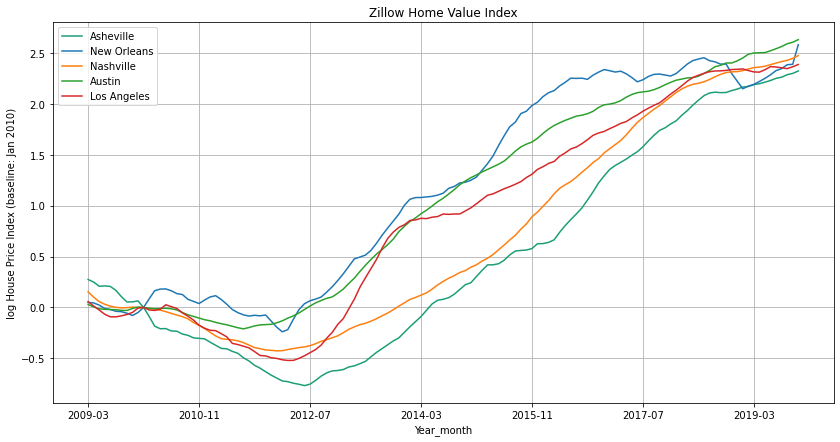

In [22]:
# Plot the HPI series for every city to see if the pre-trend are the same before 2010.
ax = hpi_log_Ash.plot(x='Year_month', y='Asheville', colormap='Dark2', figsize=(14, 7))
ax.set_xlabel('Year')
ax.set_ylabel('log House Price Index (baseline: Jan 2010)')
ax.set_title('Zillow Home Value Index')

hpi_log_NO.plot(x='Year_month', y='New Orleans', ax=ax)
hpi_log_NA.plot(x='Year_month', y='Nashville', ax=ax)
hpi_log_Aus.plot(x='Year_month', y='Austin', ax=ax)
hpi_log_la.plot(x='Year_month', y='Los Angeles', ax=ax)
plt.grid()
plt.show()

In [58]:
# Check the IV validity.
median = np.median(estab['Establishment'])
estab['touristiness'] = estab['Establishment'] > median
estab['touristiness'] = estab['touristiness'].astype(int)
estab = estab.rename(columns = {'MSA': 'city'})
estab

,city,Establishment,touristiness
1,Asheville,11639,0
4,New Orleans,29100,0
3,Nashville,37883,0
0,Austin,40281,1
2,Los Angeles,333006,1


In [59]:
housing_price_index = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/data/housing%20index/hpi.csv')
housing_price_index = housing_price_index.iloc[:, 1:]
housing_price_index

,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,...,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31
0,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,190936.0,190386.0,190084.0,...,641183.0,643141.0,645421.0,647581.0,649316.0,650498.0,651312.0,652719.0,654526.0,657545.0
1,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,186366.0,186342.0,186362.0,...,770260.0,779966.0,787492.0,795022.0,802211.0,809989.0,819440.0,829988.0,843812.0,863957.0
2,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,95079.0,95196.0,95200.0,...,199257.0,200903.0,202512.0,204574.0,206577.0,208882.0,211196.0,212950.0,215005.0,217545.0
3,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,161914.0,161413.0,160765.0,...,273713.0,276429.0,279099.0,281347.0,283291.0,284733.0,286988.0,288941.0,291590.0,293626.0
4,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,95955.0,95921.0,95887.0,...,193760.0,195153.0,196905.0,198815.0,200955.0,203172.0,205822.0,208488.0,212069.0,216218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26117,29449,Winton,City,MN,MN,Duluth,Saint Louis County,NaN,NaN,NaN,...,74889.0,75793.0,76210.0,76369.0,78337.0,80307.0,81603.0,81788.0,82257.0,82350.0
26118,29449,Eastabuchie,City,MS,MS,Laurel,Jones County,NaN,NaN,NaN,...,84554.0,85421.0,86613.0,87242.0,88038.0,87848.0,87443.0,86586.0,86482.0,86352.0
26119,29449,Dean,City,TX,TX,Wichita Falls,Clay County,NaN,NaN,NaN,...,186000.0,186788.0,188385.0,189513.0,191159.0,191922.0,193983.0,195883.0,198593.0,201083.0
26120,29449,Pulaski,City,GA,GA,NaN,Candler County,NaN,NaN,NaN,...,104324.0,104892.0,105578.0,106576.0,107416.0,108451.0,109073.0,109442.0,109616.0,110318.0


In [50]:
city = ['Los Angeles', 'Austin', 'Nashville',  'New Orleans', 'Asheville']
hpi = housing_price_index[housing_price_index['RegionName'].isin(city)].iloc[0:5,1:]
hpi = hpi.drop(hpi.columns[[i for i in range(1,164)]], axis=1)
hpi = hpi.set_index('RegionName')
hpi = pd.DataFrame(hpi.unstack().reset_index())
hpi.columns = ['date','city','housing price index']
hpi['Year_month'] = hpi.loc[:,'date'].apply(lambda x: x[:7])
hpi = hpi.iloc[:,1:]
hpi

,city,housing price index,Year_month
0,Los Angeles,450380.0,2009-03
1,Austin,239585.0,2009-03
2,Nashville,183480.0,2009-03
3,New Orleans,153999.0,2009-03
4,Asheville,219961.0,2009-03
...,...,...,...
730,Los Angeles,863957.0,2021-05
731,Austin,540086.0,2021-05
732,Nashville,340329.0,2021-05
733,New Orleans,248033.0,2021-05


In [60]:
# Join the listing data with touristiness.
df_IV = pd.merge(df_IV, estab, on=['city'], how = 'inner')
df_IV

,Unnamed: 0,Year_month,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index,Establishment,touristiness
0,0,2009-03,Asheville,0.00,9.980078,9.546963,10.426647,6.019823,2.230014,12.301210,11639,0
1,5,2009-04,Asheville,0.00,10.077357,9.550268,10.428798,6.020854,2.186051,12.297480,11639,0
2,10,2009-05,Asheville,0.00,10.142308,9.553562,10.430944,6.021884,2.197225,12.291369,11639,0
3,15,2009-06,Asheville,0.00,10.254074,9.556846,10.433086,6.022914,2.230014,12.291938,11639,0
4,20,2009-07,Asheville,0.00,10.263676,9.560118,10.435223,6.023942,2.163323,12.291153,11639,0
...,...,...,...,...,...,...,...,...,...,...,...,...
640,624,2019-07,New Orleans,3276.75,13.207957,11.310934,10.816426,7.122278,1.871802,12.254110,29100,0
641,629,2019-08,New Orleans,3331.00,13.193817,11.312586,10.818166,7.122249,1.840550,12.256732,29100,0
642,634,2019-09,New Orleans,3398.80,13.176944,11.314236,10.819904,7.122221,1.740466,12.261938,29100,0
643,639,2019-10,New Orleans,3505.00,13.347794,11.315882,10.821639,7.122193,1.757858,12.262491,29100,0


In [61]:
# Join the google index series.
google_index = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/data/goole%20index%26estab/google_index.csv')
google_index = google_index.iloc[:, 1:]
google_index = google_index.rename(columns = {'month':'Year_month'})
df_IV = pd.merge(df_IV, google_index, on=['Year_month'], how = 'inner')
df_IV

,Unnamed: 0,Year_month,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index,Establishment,touristiness,airbnb
0,0,2009-03,Asheville,0.00,9.980078,9.546963,10.426647,6.019823,2.230014,12.301210,11639,0,0
1,1,2009-03,Austin,2.00,12.783500,11.374263,10.636505,7.414723,1.887070,12.386668,40281,1,0
2,2,2009-03,Los Angeles,0.00,14.612081,13.497301,10.676550,0.000000,2.587764,13.017849,333006,1,0
3,3,2009-03,Nashville,0.00,12.828062,11.325915,10.633417,7.361960,2.208274,12.119866,37883,0,0
4,4,2009-03,New Orleans,0.00,12.753763,11.081495,10.573016,7.125786,2.091864,11.944708,29100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,640,2019-11,Asheville,1441.50,11.147570,9.900255,10.670067,6.143875,1.280934,12.603136,11639,0,69
641,641,2019-11,Austin,3429.50,13.463345,11.898646,10.888547,7.700136,1.223775,12.897260,40281,1,69
642,642,2019-11,Los Angeles,11339.00,14.991898,13.847006,10.922326,9.491384,1.667707,13.492323,333006,1,69
643,643,2019-11,Nashville,3139.25,13.495433,11.780934,10.886355,7.567899,1.223775,12.585231,37883,0,69


In [63]:
df_pv = df_IV[['Year_month', 'touristiness', 'num_listings']]
pivot = pd.pivot_table(df_pv, index=['Year_month'], columns=['touristiness'], values=['num_listings'], aggfunc=np.mean).reset_index()
pivot.columns = ['Year_month', 'low_tour', 'high_tour']
pivot = pd.merge(google_index, pivot, on=['Year_month'])
pivot['diff'] = pivot['high_tour'] - pivot['low_tour']
pivot

,Year_month,airbnb,low_tour,high_tour,diff
0,2009-03,0,0.000000,1.000,1.000000
1,2009-04,0,0.000000,1.625,1.625000
2,2009-05,0,0.333333,2.100,1.766667
3,2009-06,0,0.333333,2.500,2.166667
4,2009-07,0,0.333333,2.750,2.416667
...,...,...,...,...,...
124,2019-07,100,2457.583333,7270.750,4813.166667
125,2019-08,91,2512.166667,7350.750,4838.583333
126,2019-09,77,2585.733333,7403.900,4818.166667
127,2019-10,74,2670.000000,7463.125,4793.125000


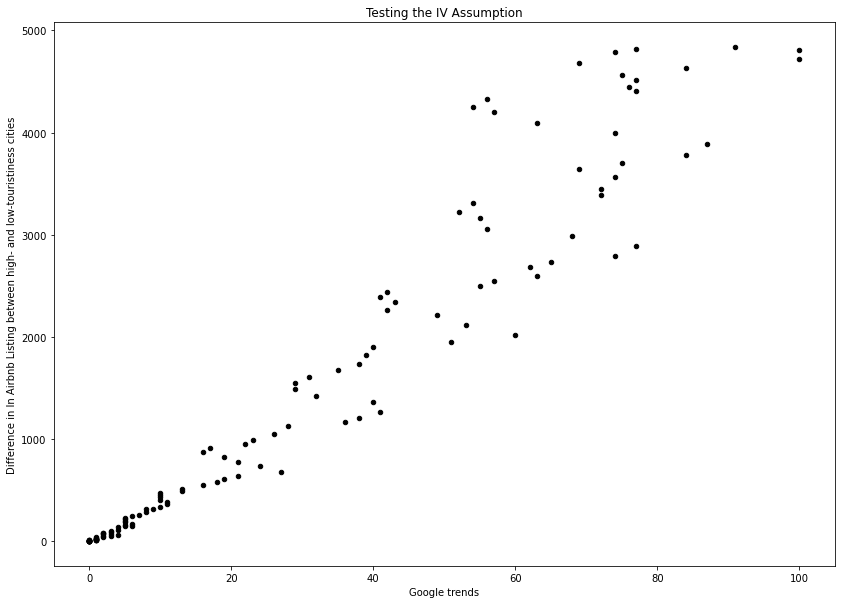

In [67]:
ax = pivot.plot(x='airbnb', y='diff', color='black', kind='scatter', figsize=(14, 10))
ax.set_xlabel('Google trends')
ax.set_ylabel('Difference in ln Airbnb Listing between high- and low-touristiness cities')
ax.set_title('Testing the IV Assumption')
plt.show()

In [15]:
# Add control variables.
google_index = google_index.rename(columns = {'month':'Year_month'})
df2 = pd.merge(df, google_index, on=['Year_month'], how = 'inner')
df2 = pd.merge(df2, estab, on=['city'], how = 'inner')

In [16]:
df2 = pd.merge(df2, occupancy_rate, on=['city'])
df2

,Unnamed: 0,Year_month,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index,airbnb,Establishment,occupancy_rate
0,0,2009-03,Asheville,0.000000,9.980078,9.546963,10.426647,6.019823,2.230014,12.301210,0,11639,0.904
1,5,2009-04,Asheville,0.000000,10.077357,9.550268,10.428798,6.020854,2.186051,12.297480,0,11639,0.904
2,10,2009-05,Asheville,0.000000,10.142308,9.553562,10.430944,6.021884,2.197225,12.291369,0,11639,0.904
3,15,2009-06,Asheville,0.000000,10.254074,9.556846,10.433086,6.022914,2.230014,12.291938,0,11639,0.904
4,20,2009-07,Asheville,0.000000,10.263676,9.560118,10.435223,6.023942,2.163323,12.291153,0,11639,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,624,2019-07,New Orleans,8.094912,13.207957,11.310934,10.816426,7.122278,1.871802,12.254110,100,29100,0.725
641,629,2019-08,New Orleans,8.111328,13.193817,11.312586,10.818166,7.122249,1.840550,12.256732,91,29100,0.725
642,634,2019-09,New Orleans,8.131472,13.176944,11.314236,10.819904,7.122221,1.740466,12.261938,77,29100,0.725
643,639,2019-10,New Orleans,8.162231,13.347794,11.315882,10.821639,7.122193,1.757858,12.262491,74,29100,0.725


In [17]:
df2['airbnb*Establishment'] = df2['airbnb'] * df2['Establishment']
df2['airbnb*Estab*occup'] = df2['airbnb'] * df2['Establishment'] * df2['occupancy_rate']

In [18]:
df2['listing x occupancy'] = df2['num_listings'] * df2['occupancy_rate']
df2

,Unnamed: 0,Year_month,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index,airbnb,Establishment,occupancy_rate,airbnb*Establishment,airbnb*Estab*occup,listing x occupancy
0,0,2009-03,Asheville,0.000000,9.980078,9.546963,10.426647,6.019823,2.230014,12.301210,0,11639,0.904,0,0.0,0.000000
1,5,2009-04,Asheville,0.000000,10.077357,9.550268,10.428798,6.020854,2.186051,12.297480,0,11639,0.904,0,0.0,0.000000
2,10,2009-05,Asheville,0.000000,10.142308,9.553562,10.430944,6.021884,2.197225,12.291369,0,11639,0.904,0,0.0,0.000000
3,15,2009-06,Asheville,0.000000,10.254074,9.556846,10.433086,6.022914,2.230014,12.291938,0,11639,0.904,0,0.0,0.000000
4,20,2009-07,Asheville,0.000000,10.263676,9.560118,10.435223,6.023942,2.163323,12.291153,0,11639,0.904,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,624,2019-07,New Orleans,8.094912,13.207957,11.310934,10.816426,7.122278,1.871802,12.254110,100,29100,0.725,2910000,2109750.0,5.868812
641,629,2019-08,New Orleans,8.111328,13.193817,11.312586,10.818166,7.122249,1.840550,12.256732,91,29100,0.725,2648100,1919872.5,5.880713
642,634,2019-09,New Orleans,8.131472,13.176944,11.314236,10.819904,7.122221,1.740466,12.261938,77,29100,0.725,2240700,1624507.5,5.895317
643,639,2019-10,New Orleans,8.162231,13.347794,11.315882,10.821639,7.122193,1.757858,12.262491,74,29100,0.725,2153400,1561215.0,5.917618


In [19]:
# one-hot city column
df2 = df2.iloc[:,1:].join(pd.get_dummies(df2.city))

# one-hot date column by year
df2['Year_month'] = df2['Year_month'].map(lambda x: x.split('-')[0])
df2 = df2.iloc[:,1:].join(pd.get_dummies(df2.Year_month))
df2

,city,num_listings,Passenger,GDP,PI,population,unemployment rate,housing price index,airbnb,Establishment,occupancy_rate,airbnb*Establishment,airbnb*Estab*occup,listing x occupancy,Asheville,Austin,Los Angeles,Nashville,New Orleans,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Asheville,0.000000,9.980078,9.546963,10.426647,6.019823,2.230014,12.301210,0,11639,0.904,0,0.0,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Asheville,0.000000,10.077357,9.550268,10.428798,6.020854,2.186051,12.297480,0,11639,0.904,0,0.0,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Asheville,0.000000,10.142308,9.553562,10.430944,6.021884,2.197225,12.291369,0,11639,0.904,0,0.0,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Asheville,0.000000,10.254074,9.556846,10.433086,6.022914,2.230014,12.291938,0,11639,0.904,0,0.0,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Asheville,0.000000,10.263676,9.560118,10.435223,6.023942,2.163323,12.291153,0,11639,0.904,0,0.0,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,New Orleans,8.094912,13.207957,11.310934,10.816426,7.122278,1.871802,12.254110,100,29100,0.725,2910000,2109750.0,5.868812,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
641,New Orleans,8.111328,13.193817,11.312586,10.818166,7.122249,1.840550,12.256732,91,29100,0.725,2648100,1919872.5,5.880713,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
642,New Orleans,8.131472,13.176944,11.314236,10.819904,7.122221,1.740466,12.261938,77,29100,0.725,2240700,1624507.5,5.895317,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
643,New Orleans,8.162231,13.347794,11.315882,10.821639,7.122193,1.757858,12.262491,74,29100,0.725,2153400,1561215.0,5.917618,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [21]:
# First stage on num_listings.
first_y = df2['num_listings']

first_X = sm.add_constant(df2[['airbnb*Establishment', 'airbnb*Estab*occup', 'GDP','PI','Passenger', 'population','unemployment rate','Los Angeles', 'Asheville','Austin','Nashville', 
                          '2009','2010', '2011', '2012', '2013', '2014', '2015', 
                          '2016', '2017', '2018']])

result = sm.OLS(first_y, first_X).fit(cov_type='HC1')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_listings   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1523.
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:49:51   Log-Likelihood:                -142.69
No. Observations:                 645   AIC:                             329.4
Df Residuals:                     623   BIC:                             427.7
Df Model:                          21                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -377.3644     23.145    -16.305      0.000    -422.727    -332.002
airbnb*Establishment -8.113e-07   2.22e-07     -3.650      0.000   -1.25e-06   -3.76e-07
airbnb*Estab*occup    8.326e-07   2.36e-07      3.521      0.000    3.69e-07     1.3e-06
GDP                     -7.7386      0.641    -12.076      0.000      -8.995      -6.483
PI                      43.6531      2.433     17.940      0.000      38.884      48.422
Passenger                0.0853      0.093      0.917      0.359      -0.097       0.268
population               0.1720      0.021      8.081      0.000       0.130       0.214
unemployment rate       -0.4951      0.122     -4.071      0.000      -0.733      -0.257
Los Angeles             16.1958      1.484     10.910      0.000      13.286      19.105
Asheville               -5.6895      0.881     -6.459      0.000      -7.416      -3.963
Austin                   1.0797      0.236      4.582      0.000       0.618       1.542
Nashville               -0.6381      0.199     -3.200      0.001      -1.029      -0.247
2009                     0.2399      0.450      0.533      0.594      -0.642       1.122
2010                    -0.0739      0.391     -0.189      0.850      -0.841       0.693
2011                     0.1821      0.356      0.511      0.610      -0.517       0.881
2012                     0.6854      0.293      2.340      0.019       0.111       1.259
2013                     0.7919      0.251      3.157      0.002       0.300       1.283
2014                     0.8088      0.205      3.952      0.000       0.408       1.210
2015                     0.8170      0.164      4.967      0.000       0.495       1.139
2016                     0.7516      0.126      5.943      0.000       0.504       1.000
2017                     0.5810      0.092      6.298      0.000       0.400       0.762
2018                     0.3066      0.065      4.699      0.000       0.179       0.434
==============================================================================
Omnibus:                       38.323   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.456
Skew:                          -0.541   Prob(JB):                     4.96e-11
Kurtosis:                       3.770   Cond. No.                     1.60e+10
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.6e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# First stage on second IV.
first_y1 = df2['listing x occupancy']

first_X1 = sm.add_constant(df2[['airbnb*Establishment', 'airbnb*Estab*occup', 'GDP','PI','Passenger', 'population','unemployment rate','Los Angeles', 'Asheville','Austin','Nashville', 
                          '2009','2010', '2011', '2012', '2013', '2014', '2015', 
                          '2016', '2017', '2018']])

result_fs = sm.OLS(first_y1, first_X1).fit(cov_type='HC1')
result_fs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     listing x occupancy   R-squared:                       0.986
Model:                             OLS   Adj. R-squared:                  0.986
Method:                  Least Squares   F-statistic:                     1850.
Date:                 Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                         04:50:15   Log-Likelihood:                -98.211
No. Observations:                  645   AIC:                             240.4
Df Residuals:                      623   BIC:                             338.7
Df Model:                           21                                         
Covariance Type:                   HC1                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -294.3724     21.442    -13.729      0.000    -336.399    -252.346
airbnb*Establishment -1.996e-06    2.2e-07     -9.058      0.000   -2.43e-06   -1.56e-06
airbnb*Estab*occup    2.113e-06   2.35e-07      9.010      0.000    1.65e-06    2.57e-06
GDP                     -3.7882      0.598     -6.335      0.000      -4.960      -2.616
PI                      31.7171      2.249     14.104      0.000      27.310      36.125
Passenger                0.0806      0.088      0.919      0.358      -0.091       0.252
population               0.1849      0.021      8.902      0.000       0.144       0.226
unemployment rate       -0.6775      0.108     -6.291      0.000      -0.889      -0.466
Los Angeles              8.2041      1.394      5.885      0.000       5.472      10.936
Asheville               -0.9812      0.837     -1.172      0.241      -2.622       0.659
Austin                   0.6415      0.216      2.973      0.003       0.219       1.064
Nashville               -0.6919      0.184     -3.755      0.000      -1.053      -0.331
2009                    -0.1004      0.417     -0.241      0.810      -0.918       0.717
2010                    -0.3942      0.366     -1.076      0.282      -1.112       0.324
2011                    -0.1461      0.331     -0.442      0.659      -0.794       0.502
2012                     0.3195      0.273      1.168      0.243      -0.217       0.856
2013                     0.4312      0.234      1.842      0.065      -0.028       0.890
2014                     0.4769      0.191      2.495      0.013       0.102       0.851
2015                     0.5274      0.154      3.422      0.001       0.225       0.829
2016                     0.5116      0.119      4.315      0.000       0.279       0.744
2017                     0.4090      0.087      4.715      0.000       0.239       0.579
2018                     0.2133      0.062      3.423      0.001       0.091       0.335
==============================================================================
Omnibus:                       53.331   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.454
Skew:                          -0.662   Prob(JB):                     5.03e-16
Kurtosis:                       3.932   Cond. No.                     1.60e+10
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.6e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Second Stage of TSLS.
df2['predicted_num_listings'] = result.predict()
df2['predicted_listing_x_occup'] = result_fs.predict()

second_y = df2['housing price index']
second_X = sm.add_constant(df2[['predicted_num_listings','predicted_listing_x_occup','GDP','PI','Passenger', 'population','unemployment rate','Los Angeles', 'Asheville','Austin','Nashville', 
                          '2009','2010', '2011', '2012', '2013', '2014', '2015', 
                          '2016', '2017', '2018' ]])
results_ss = sm.OLS(second_y, second_X).fit(cov_type = 'HC1')
print(results_ss.summary())

                             OLS Regression Results                            
Dep. Variable:     housing price index   R-squared:                       0.992
Model:                             OLS   Adj. R-squared:                  0.992
Method:                  Least Squares   F-statistic:                     7942.
Date:                 Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                         04:50:21   Log-Likelihood:                 1210.3
No. Observations:                  645   AIC:                            -2377.
Df Residuals:                      623   BIC:                            -2278.
Df Model:                           21                                         
Covariance Type:                   HC1                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [24]:
# No la. Firts stage on first IV.
df_no_la = df2.loc[df2['city'] != 'Los Angeles']
first_y_2 = df_no_la['num_listings']

first_X_2 = sm.add_constant(df_no_la[['airbnb*Establishment', 'airbnb*Estab*occup','GDP','PI','Passenger', 'population','unemployment rate', 'Asheville','Austin','Nashville', '2009',
                          '2010', '2011', '2012', '2013', '2014', '2015', 
                          '2016', '2017', '2018']])

result = sm.OLS(first_y_2, first_X_2).fit(cov_type='HC1')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_listings   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1001.
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        04:50:31   Log-Likelihood:                -103.44
No. Observations:                 516   AIC:                             248.9
Df Residuals:                     495   BIC:                             338.0
Df Model:                          20                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -120.9669     44.815     -2.699      0.007    -208.803     -33.131
airbnb*Establishment -3.624e-06   4.05e-07     -8.954      0.000   -4.42e-06   -2.83e-06
airbnb*Estab*occup    4.294e-06   4.74e-07      9.061      0.000    3.37e-06    5.22e-06
GDP                     31.5513      7.807      4.041      0.000      16.249      46.853
PI                      10.0640      6.797      1.481      0.139      -3.258      23.385
Passenger               -0.0224      0.101     -0.222      0.824      -0.221       0.176
population             -46.9167      8.204     -5.719      0.000     -62.996     -30.837
unemployment rate       -0.4559      0.146     -3.117      0.002      -0.743      -0.169
Asheville               -2.6101      2.301     -1.134      0.257      -7.120       1.900
Austin                   5.4097      0.553      9.778      0.000       4.325       6.494
Nashville                2.6843      0.402      6.670      0.000       1.895       3.473
2009                     0.4131      0.498      0.830      0.407      -0.562       1.388
2010                     0.0214      0.432      0.049      0.961      -0.826       0.869
2011                     0.0997      0.388      0.257      0.797      -0.660       0.860
2012                     0.5971      0.313      1.908      0.056      -0.016       1.210
2013                     0.6791      0.265      2.564      0.010       0.160       1.198
2014                     0.6834      0.217      3.152      0.002       0.258       1.108
2015                     0.6869      0.174      3.945      0.000       0.346       1.028
2016                     0.6362      0.131      4.847      0.000       0.379       0.893
2017                     0.4642      0.092      5.039      0.000       0.284       0.645
2018                     0.2575      0.062      4.130      0.000       0.135       0.380
==============================================================================
Omnibus:                       25.874   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.758
Skew:                          -0.502   Prob(JB):                     3.45e-07
Kurtosis:                       3.612   Cond. No.                     6.75e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 6.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# No la. First Stage on second IV.
first_y1_no = df_no_la['listing x occupancy']

first_X1_no = sm.add_constant(df_no_la[['airbnb*Establishment', 'airbnb*Estab*occup', 'GDP','PI','Passenger', 'population','unemployment rate', 'Asheville','Austin','Nashville', 
                          '2009','2010', '2011', '2012', '2013', '2014', '2015', 
                          '2016', '2017', '2018']])

result_fs = sm.OLS(first_y1_no, first_X1_no).fit(cov_type='HC1')
result_fs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     listing x occupancy   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     1117.
Date:                 Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                         04:51:08   Log-Likelihood:                -57.490
No. Observations:                  516   AIC:                             157.0
Df Residuals:                      495   BIC:                             246.1
Df Model:                           20                                         
Covariance Type:                   HC1                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.5172     41.005      0.427      0.669     -62.850      97.885
airbnb*Establishment -4.322e-06   4.08e-07    -10.601      0.000   -5.12e-06   -3.52e-06
airbnb*Estab*occup    4.886e-06   4.73e-07     10.328      0.000    3.96e-06    5.81e-06
GDP                     44.7634      7.116      6.290      0.000      30.816      58.711
PI                     -12.1135      6.109     -1.983      0.047     -24.087      -0.140
Passenger                0.0161      0.096      0.167      0.867      -0.173       0.205
population             -53.9521      7.635     -7.066      0.000     -68.917     -38.987
unemployment rate       -0.5037      0.126     -4.007      0.000      -0.750      -0.257
Asheville                7.0223      1.936      3.626      0.000       3.227      10.818
Austin                   4.7347      0.533      8.888      0.000       3.691       5.779
Nashville                2.4645      0.391      6.305      0.000       1.698       3.231
2009                    -0.2716      0.452     -0.601      0.548      -1.157       0.614
2010                    -0.6378      0.399     -1.598      0.110      -1.420       0.144
2011                    -0.5938      0.353     -1.684      0.092      -1.285       0.097
2012                    -0.1438      0.285     -0.504      0.614      -0.703       0.416
2013                    -0.0494      0.242     -0.204      0.838      -0.523       0.424
2014                     0.0266      0.198      0.134      0.893      -0.361       0.414
2015                     0.1319      0.159      0.831      0.406      -0.179       0.443
2016                     0.1982      0.120      1.646      0.100      -0.038       0.434
2017                     0.1816      0.086      2.118      0.034       0.014       0.350
2018                     0.0999      0.060      1.662      0.096      -0.018       0.218
==============================================================================
Omnibus:                       34.844   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.990
Skew:                          -0.587   Prob(JB):                     4.62e-10
Kurtosis:                       3.790   Cond. No.                     6.75e+09
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 6.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# No la. Second stage of TSLS.
df_no_la['predicted_num_listings'] = result.predict()
df_no_la['predicted_listing_x_occup'] =result_fs.predict()

second_y = df_no_la['housing price index']
second_X = sm.add_constant(df_no_la[['predicted_num_listings','predicted_listing_x_occup', 'GDP','PI','Passenger', 'population','unemployment rate', 'Asheville','Austin','Nashville', 
                          '2010', '2011', '2012', '2013', '2014', '2015', 
                          '2016', '2017', '2018' ]])
results_ss = sm.OLS(second_y, second_X).fit(cov_type = 'HC1')
print(results_ss.summary())

                             OLS Regression Results                            
Dep. Variable:     housing price index   R-squared:                       0.981
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                     2085.
Date:                 Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                         04:51:23   Log-Likelihood:                 1000.4
No. Observations:                  516   AIC:                            -1961.
Df Residuals:                      496   BIC:                            -1876.
Df Model:                           19                                         
Covariance Type:                   HC1                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       